## Predicting Diabetes using Keras library

Let's consider an example that makes a prediction on the classic Pima Indians Diabetes dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from numpy import loadtxt

dataset = loadtxt("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", delimiter=",")
x = dataset[:,0:8]
y = dataset[:, 8]

In [3]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [4]:
print(type(dataset))

<class 'numpy.ndarray'>


In [5]:
# Lets convert this numpy ndarray into pandas dataframe
df = pd.DataFrame(dataset, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome'])
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [7]:
print(len(df.loc[df['Outcome'] == 0]))
print(len(df.loc[df['Outcome'] == 1]))

500
268


### Inference: dataset is neither balanced nor imbalanced

## Handling missing values

In [8]:
for col in df.columns:
    #print(str((df[col] == 0)))
    print (col + ":" + str((df[col] == 0).sum()))

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [9]:
df1=df.select_dtypes(include=['float64', "int64"])

In [10]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df1.isin([0]).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [12]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df1[cols] = df1[cols].replace({'0':np.nan, 0:np.nan})

In [13]:
df1.isin([0]).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [14]:
df1.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

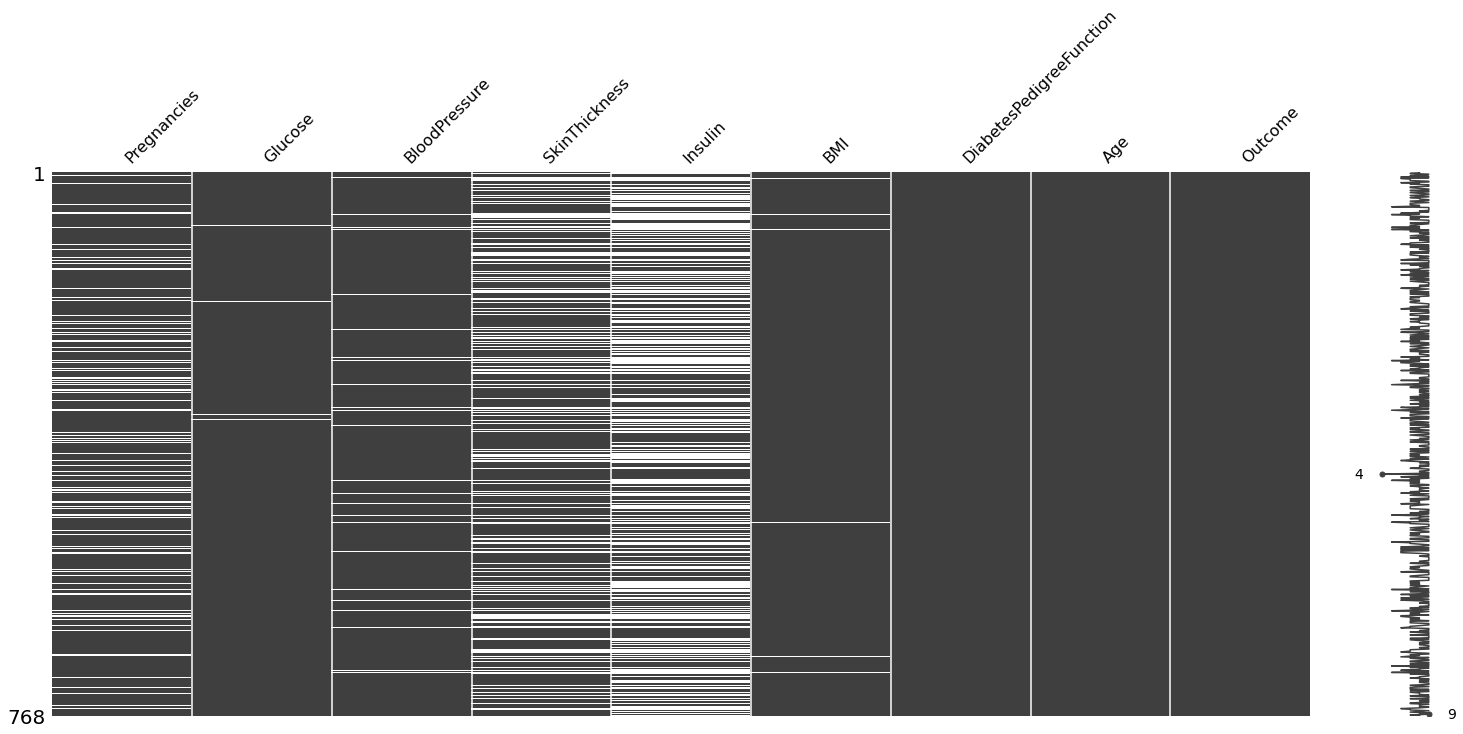

In [15]:

import missingno as msn
msn.matrix(df1)

In [16]:
print(df1.BloodPressure.sample().values[0])

74.0


In [17]:
def impute_nan(df,feature,mean,median):
    df[feature+"_mean"]=df[feature].fillna(mean)
    df[feature+"_median"]=df[feature].fillna(median)
    df[feature+"_random"]=df[feature]
    ##It will have the random sample to fill the na
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

mean_val = df1.BloodPressure.mean()
median_val = df1.BloodPressure.median()
impute_nan(df1,'BloodPressure',mean_val,median_val)

In [18]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_mean,BloodPressure_median,BloodPressure_random
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0,72.0,72.0,72.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,66.0,66.0,66.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,64.0,64.0,64.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,66.0,66.0,66.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,40.0,40.0,40.0


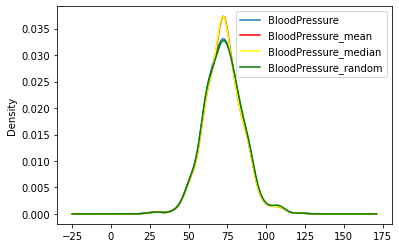

In [19]:
# Check the distributions

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df1['BloodPressure'].plot(kind='kde', ax=ax)
df1['BloodPressure_mean'].plot(kind='kde', ax=ax, color='red')
df1['BloodPressure_median'].plot(kind='kde', ax=ax, color='yellow')
df1['BloodPressure_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Inference : Missing values of 'Blood pressure' feature is best imputed using random imputation since it gives almost same distribution as original.

#### Lets remove unnecessary columns

In [20]:
cols=['BloodPressure','BloodPressure_mean','BloodPressure_median']
df1=df1.drop(cols,axis=1)

In [21]:
df1.isnull().sum()

Pregnancies                 111
Glucose                       5
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BloodPressure_random          0
dtype: int64

In [22]:
df1.isnull().sum()

Pregnancies                 111
Glucose                       5
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BloodPressure_random          0
dtype: int64

### Lets impute BMI feature with KNN imputer

In [23]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)

cols =['BMI']
df1['BMI_KNN'] = knn.fit_transform(df1[cols])

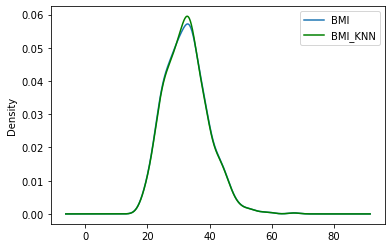

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['BMI'].plot(kind='kde', ax=ax)
df1['BMI_KNN'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
df1=df1.drop('BMI',axis=1)

In [26]:
df1.isnull().sum()

Pregnancies                 111
Glucose                       5
SkinThickness               227
Insulin                     374
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
BloodPressure_random          0
BMI_KNN                       0
dtype: int64

In [27]:
pip install impyute

In [28]:
from impyute.imputation.cs import mice

# start the MICE training
data_imputed=mice(df1.values)

In [29]:
print(type(data_imputed))

<class 'numpy.ndarray'>


In [30]:
data_imputed.shape

(768, 9)

In [31]:
df1.head(2)

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_random,BMI_KNN
0,6.0,148.0,35.0,NaN,0.627,50.0,1.0,72.0,33.6
1,1.0,85.0,29.0,NaN,0.351,31.0,0.0,66.0,26.6


In [32]:
# Convert this ndarray to dataframe
cleaned_df = pd.DataFrame(data_imputed,columns=['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
    'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BloodPressure_random','BMI_KNN'])

In [33]:
df1['SkinThickness_MICE']=cleaned_df['SkinThickness']
df1['Pregnancies_MICE']=cleaned_df['Pregnancies']
df1['Insulin_MICE']=cleaned_df['Insulin']
df1['Glucose_MICE']=cleaned_df['Glucose']

In [34]:
df1[df1.SkinThickness.isna()][['SkinThickness','SkinThickness_MICE']]

,SkinThickness,SkinThickness_MICE
2,NaN,21.101574
5,NaN,21.754537
7,NaN,30.991140
9,NaN,30.952150
10,NaN,32.990055
...,...,...
757,NaN,34.706829
758,NaN,32.620853
759,NaN,35.981631
762,NaN,18.879453


In [35]:
cols = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin']
df1= df1.drop(cols,axis=1)

In [36]:
df1.isnull().sum()

DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
BloodPressure_random        0
BMI_KNN                     0
SkinThickness_MICE          0
Pregnancies_MICE            0
Insulin_MICE                0
Glucose_MICE                0
dtype: int64

### Train, test, CV split

In [37]:
df1.columns

Index(['DiabetesPedigreeFunction', 'Age', 'Outcome', 'BloodPressure_random',
       'BMI_KNN', 'SkinThickness_MICE', 'Pregnancies_MICE', 'Insulin_MICE',
       'Glucose_MICE'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

feature_columns = ['DiabetesPedigreeFunction', 'Age', 'BloodPressure_random',
       'BMI_KNN', 'SkinThickness_MICE', 'Pregnancies_MICE', 'Insulin_MICE',
       'Glucose_MICE']
predicted_class = ['Outcome']

In [39]:
X = df1[feature_columns].values
y = df1[predicted_class].values

train_x, X_test, train_y, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2)

## Modelling

In [40]:
# Lets do a simple Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [42]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.721


In [43]:
# Xgboost with hyper parameter optimization

In [44]:
## Hyper Parameters

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [45]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [46]:
classifier=xgboost.XGBClassifier(eval_metric='logloss')

In [47]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [49]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 5.09 seconds.


C:\Users\saras\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0.3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=0.3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test.ravel(),cv=10)

C:\Users\saras\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saras\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\saras\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

In [53]:
score

array([0.6875    , 0.625     , 0.6875    , 0.625     , 0.73333333,
       0.8       , 0.46666667, 0.73333333, 0.8       , 0.73333333])

In [54]:
score.mean()

0.6891666666666667

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu,sigmoid

from sklearn.preprocessing import StandardScaler

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
def create_model(layers,activation):
    model=Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else: 
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1))  # Output layer with one node since here we have binary classification
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model, verbose =0)  # verbose =0 wont print any execution statements

<ipython-input-65-f10bd26d81f9>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model, verbose =0)  # verbose =0 wont print any execution statements


In [66]:
model

In [67]:
# Hyper parameters to tune.

layers = [[20],[40,20],[45,30,15]]
# First entry means, after the i/p layer, model will have single hidden layer with 20 neurons
# Second entry is 2 hidden layers with respective no of nodes. Similarly third entry. Likewise we can give any # of layers and nodes
activation = ['sigmoid', 'relu']

param_grid = dict(layers=layers, activation=activation, batch_size = [10, 20, 30, 50], epochs= [10, 15])
grid = GridSearchCV(estimator=model , param_grid = param_grid)

In [68]:
grid_result = grid.fit(X_train,y_train)

In [69]:
[grid_result.best_score_ , grid_result.best_params_]

[0.6903731226921082,
 {'activation': 'sigmoid',
  'batch_size': 20,
  'epochs': 15,
  'layers': [45, 30, 15]}]

In [70]:
pred_y = grid.predict(X_test)

In [71]:
y_pred = (pred_y> 0.5)

In [72]:
y_pred

array([[ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[81 25]
 [23 25]]
0.6883116883116883
